# Análise de dados

### Grupo: Guilherme Barão, Iran Cruz Soares, Beatriz Evelbauer, Carlos Henrique

*Disciplina: Análise de Regressão*


---



Para este trabalho, escolhemos os dados do Happiness Index 2022, disponíveis em: https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021

Escolhemos essa base pois nos interessamos pelos dados apresentados e ela parece ideal para realizar uma análise de regressão linear simples, com diversas variáveis numéricas quantitativas que parecem ser relacionadas e podem servir para análise. 

Nosso objetivo será analisar as informações disponíveis e realizar uma regressão linear simples entre uma das variáveis da tabela e a variável resposta *Ladder score*, que representa a pontuação de felicidade de cada país. Essa variável será a variável resposta pois queremos analisar como os atributos de cada país influenciam a felicidade de sua população.

## Índice<a class='anchor' id='top'></a>
- [Importando Bibliotecas](#bibliotecas)📚
- [Analisando os Dados](#analise)🔍
- [Aplicando e interpretando a Regressão](#regressao)📈
- [Realizando previsões](#previsoes)🔮

## Importando Bibliotecas 📚 <a class='anchor' id='bibliotecas'></a> [↑](#top)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Analisando os Dados 🔍<a class='anchor' id='analise'></a> [↑](#top)

No bloco abaixo, criamos uma classe com funções úteis para a análise exploratória.

In [3]:
class Exploratory_Analysis:

    def __init__(self, data):

        self.data = data

        self.describe = []
        for col in pd.DataFrame(self.data).columns:
            if pd.DataFrame(self.data[col]).dtypes[0] == 'object':
                self.describe.append([
                    pd.DataFrame(self.data[col]).dtypes[0],
                    pd.DataFrame(self.data[col]).isna().sum().sum(),
                    '--', '--', '--', '--', '--', '--'
                ])
            else:
                self.describe.append([
                    pd.DataFrame(self.data[col]).dtypes[0],
                    pd.DataFrame(self.data[col]).isna().sum().sum(),
                    min(self.data[col]),
                    np.quantile(self.data[col], 0.25),
                    np.mean(self.data[col]),
                    np.median(self.data[col]),
                    np.quantile(self.data[col], 0.75),
                    max(self.data[col])
                ])
        self.describe = pd.DataFrame(self.describe)
        self.describe.index = pd.DataFrame(self.data).columns
        self.describe.columns = ['dtype', 'nulls', 'min', '1st q', 'mean', 'median', '3st q', 'max']

        self.co_vars = []
        self.resp_var = []
        self.reg_vars = pd.DataFrame()
        self.corr_matrix = pd.DataFrame()

    def select_reg_vars(self, co_vars, resp_var):

        self.co_vars = co_vars
        self.resp_var = resp_var
        self.reg_vars = self.data[resp_var + co_vars]

    def set_corr_matrix(self):

        self.corr_matrix = self.reg_vars.corr()[self.resp_var][1:]

    def exp_graphics(self, rows, cols, size):
        
        fig, axs = plt.subplots(rows, cols, figsize=(size, size))
        counter = 0

        for i in range(rows):
            for j in range(cols):
                axs[i, j].scatter(
                    self.reg_vars[self.co_vars[counter]],
                    self.reg_vars[self.resp_var], 
                    alpha=0.5, 
                    color='blue'
                )
                axs[i, j].grid(linestyle='--')
                axs[i, j].spines['top'].set_visible(False)
                axs[i, j].spines['right'].set_visible(False)
                axs[i, j].set_xlabel(self.co_vars[counter])
                axs[i, j].set_ylabel('Score')
                counter += 1

        plt.show()
        plt.close()

    def corr_heatmap(self, height, width):

        plt.figure(figsize=(width, height))
        corr_plot = sns.heatmap(self.corr_matrix, annot=True, cmap="coolwarm", center=0, linewidth=0.8)
        corr_plot.xaxis.tick_top()
        plt.show()
        plt.close()

Importando os dados e gerando algumas estatísticas descritivas:

In [4]:
dados = pd.read_csv('https://raw.githubusercontent.com/guij2/analise_regressao/main/world-happiness-report-2021.csv')
display(dados.head())

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [6]:
exp_analysis_obj = Exploratory_Analysis(dados)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(exp_analysis_obj.describe)

,dtype,nulls,min,1st q,mean,median,3st q,max
Country name,object,0,--,--,--,--,--,--
Regional indicator,object,0,--,--,--,--,--,--
Ladder score,float64,0,2.523,4.852,5.532839,5.534,6.255,7.842
Standard error of ladder score,float64,0,0.026,0.043,0.058752,0.054,0.07,0.173
upperwhisker,float64,0,2.596,4.991,5.648007,5.625,6.344,7.904
lowerwhisker,float64,0,2.449,4.706,5.417631,5.413,6.128,7.78
Logged GDP per capita,float64,0,6.635,8.541,9.432208,9.569,10.421,11.647
Social support,float64,0,0.463,0.75,0.814745,0.832,0.905,0.983
Healthy life expectancy,float64,0,48.478,59.802,64.992799,66.603,69.6,76.953
Freedom to make life choices,float64,0,0.382,0.718,0.791597,0.804,0.877,0.97


Parece razoável interpretar
- Logged GDP per capita;
- Social support; 
- Healthy life expectancy; 
- Freedom to make life choices; 
- Generosity, e
- Perceptions of corruption

Como as possíveis varíaveis independentes do modelo, por serem índices de cada país que podem estar relacionados com a felicidade da população. As colunas "Explained by" vêm dessas colunas, e as demais colunas não possuem poder explicativo.

In [12]:
co_vars = [
    'Logged GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]
resp_var = ['Ladder score']
reg_vars = pd.DataFrame(dados[co_vars + resp_var])
exp_analysis_obj.select_reg_vars(co_vars, resp_var)
exp_analysis_obj.set_corr_matrix()

Gerando scatterplots comparando cada possível covariável com a variável resposta "Score":

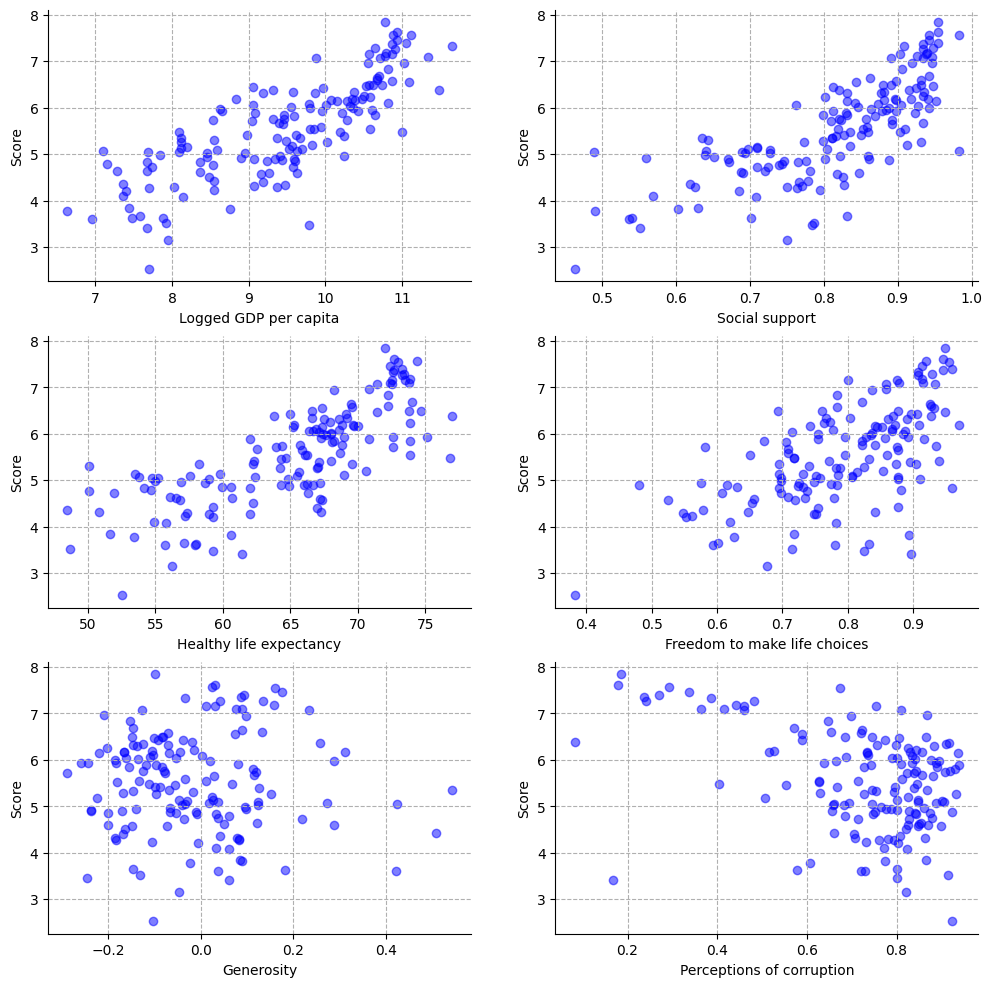

In [13]:
exp_analysis_obj.exp_graphics(3, 2, 12)

Gerando um gráfico com as correlações entre as possíveis covariáveis e a variável resposta:

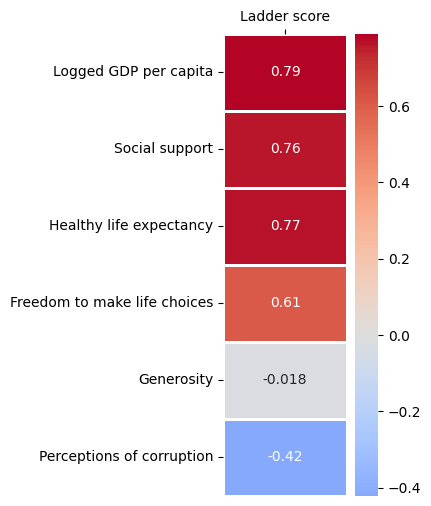

In [14]:
exp_analysis_obj.corr_heatmap(6, 2)

Pelos gráficos exploratórios e a matriz de correlação podemos perceber que há uma maior tendência das primeiras três covariáveis - Log do Pib per capita, _social support_ e expectativa de vida saudável - explicarem os dados obtidos no _Score_. Tendência essa que é comprovada pelos valores de correlação obtidos entre cada covariável e a variável resposta.

Definindo uma classe com funções úteis para a análise de regressão:

In [10]:
class Regression_Analysis:

    def __init__(self, reg_vars, co_vars, resp_var):

        self.reg_vars = reg_vars
        self.co_vars = co_vars
        self.resp_var = resp_var
        self.trains = []
        self.tests = []

        for co_var in self.co_vars:
            X_train, X_test, Y_train, Y_test = train_test_split(
                self.reg_vars[co_var],
                self.reg_vars[self.resp_var],
                train_size=0.75
            )
            while max(X_train) < max(X_test) or min(X_train) > min(X_test):
                X_train, X_test, Y_train, Y_test = train_test_split(
                    self.reg_vars[co_var],
                    self.reg_vars[self.resp_var],
                    train_size=0.75
                )
            self.trains.append((X_train, Y_train))
            self.tests.append((X_test, Y_test))

        self.fits = []
        for train in self.trains:
            self.fits.append(sm.OLS(train[1], sm.add_constant(train[0])).fit())

        self.X = []
        for train in self.trains:
            self.X.append(np.linspace(min(train[0]), max(train[0]), num=111, endpoint=True))

        self.CIs = []
        for fit in self.fits:
            self.CIs.append(fit.get_prediction().summary_frame(alpha=0.05))

        self.summary = []
        for fit in self.fits:
            self.summary.append([
                fit.rsquared,
                fit.pvalues[0],
                fit.pvalues[1],
                fit.bse[0],
                fit.bse[1]
            ])
        self.summary = pd.DataFrame(self.summary)
        self.summary.index = pd.DataFrame(self.reg_vars[self.co_vars]).columns
        self.summary.columns = ['R^2', 'p-valor beta_0', 'p-valor beta_1', 'Std error beta_0', 'Std error beta_1']

    def plot_fits(self, rows, cols, size):

        fig, axs = plt.subplots(rows, cols, figsize=(size, size))
        counter = 0

        for i in range(rows):
            for j in range(cols):
                Y_hat = self.X[i] * self.fits[i].params[self.co_vars[i]] + self.fits[i].params['const']
                axs[i, j].scatter(
                    self.reg_vars[self.co_vars[counter]],
                    self.reg_vars[self.resp_var],
                    alpha=0.5,
                    color='blue',
                    label='Dados'
                )
                axs[i, j].plot(
                    self.X[counter],
                    Y_hat,
                    color='black',
                    label='Regressão'
                )
                axs[i, j].legend()
                axs[i, j].grid(linestyle='--')
                axs[i, j].spines['top'].set_visible(False)
                axs[i, j].spines['right'].set_visible(False)
                axs[i, j].set_xlabel(self.co_vars[counter])
                axs[i, j].set_ylabel(self.resp_var[0])
                counter += 1

        plt.show()
        plt.close()

    def residual_plot(self, co_var):

        for i in range(len(self.co_vars)):
            if self.co_vars[i] == co_var:
                Y_hat = self.trains[i][0] * self.fits[i].params[self.co_vars[i]] + self.fits[i].params['const']
                plt.scatter(self.trains[i][1], Y_hat, alpha=0.5, color='blue')
                plt.grid(linestyle='--')
                plt.subplot().spines['top'].set_visible(False)
                plt.subplot().spines['right'].set_visible(False)
                plt.xlabel(self.resp_var[0])
                plt.ylabel('Resíduo')
                plt.title(f'Resíduo da regressão com a covariavel {co_var}')
                plt.savefig('Residual')

Realizando regressões rápidas nas possíveis covariáveis:

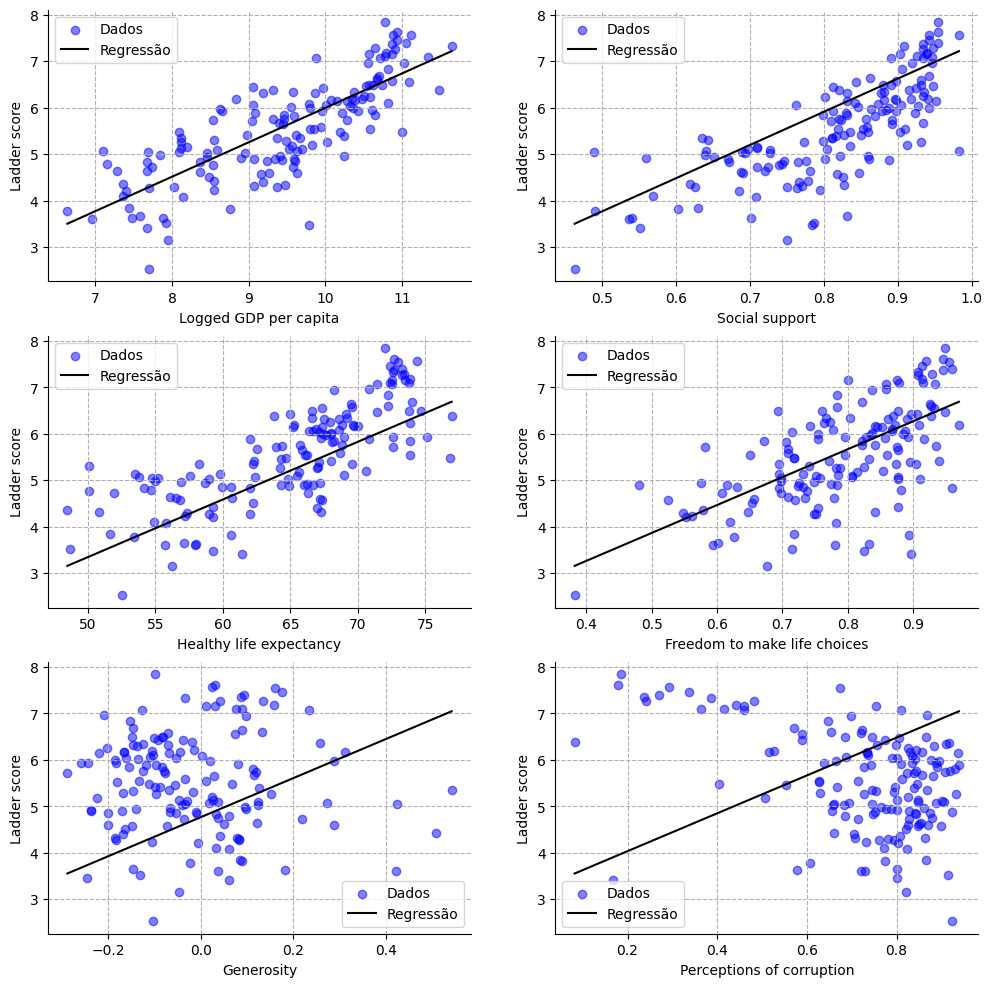

In [15]:
reg_analysis_obj = Regression_Analysis(
    exp_analysis_obj.reg_vars,
    exp_analysis_obj.co_vars,
    exp_analysis_obj.resp_var
)

reg_analysis_obj.plot_fits(3, 2, 12)

In [16]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(reg_analysis_obj.summary)

,R^2,p-valor beta_0,p-valor beta_1,Std error beta_0,Std error beta_1
Logged GDP per capita,0.617986,9.142769e-03,1.613175e-24,0.534329,0.055829
Social support,0.589117,9.825804e-01,8.751675e-23,0.442419,0.543550
Healthy life expectancy,0.596130,2.401009e-04,3.404988e-23,0.629777,0.009670
Freedom to make life choices,0.323109,1.699116e-01,7.637749e-11,0.649637,0.801908
Generosity,0.000003,5.672557e-79,9.866172e-01,0.104862,0.672284
Perceptions of corruption,0.193888,5.769071e-38,1.324380e-06,0.371201,0.502535


Como esperado, log do PIB per capita, social support, e expectativa de vida parecem ajustar a variável resposta melhor que as outras possiveis covariáveis.

## Aplicando e interpretando a Regressão 📈<a class='anchor' id='regressao'></a> [↑](#top)

Escolhemos a covariável _log Pib per capita_, por apresentar melhor $R^2$ e correlação com a variável resposta, ter regressão significativa e porque achamos interessante a possibilidade de que medidas de poder aquisitivo possam explicar a felicidade de uma população.

Primeiro, vamos dividir os dados em dados de teste e de treinamento:

In [24]:
x = dados['Logged GDP per capita']
y = dados['Ladder score']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, train_size=0.75, random_state=1)

print(f'maxtreino: {max(x_treino)}, \nmaxteste: {max(x_teste)}, \nmintreino: {min(x_treino)}, \nminteste: {min(x_teste)}')

maxtreino: 11.647, 
maxteste: 11.488, 
mintreino: 6.635, 
minteste: 7.288


Utilizamos a função `train_test_split` para separar 75% dos dados para treinamento e 25% para previsão. Podemos ver pelas informações acima que não estaremos extrapolando nas previsões.




Modelando a regressão da forma $Y = \beta_1x+\beta_0+\epsilon$, temos:

In [25]:
fit = sm.OLS(y_treino, sm.add_constant(x_treino)).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     227.0
Date:                Fri, 26 May 2023   Prob (F-statistic):           2.09e-28
Time:                        03:03:56   Log-Likelihood:                -106.83
No. Observations:                 111   AIC:                             217.7
Df Residuals:                     109   BIC:                             223.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.82

Dessa forma, encontramos o ajuste $\hat{y} = 0.7783x-1.8265$.

Ou seja, o score de felicidade, em média:
- assumiria valor $-1.8265$ caso o log do PIB per capita fosse igual a 0, 
- aumenta $0.7783$ para cada unidade de aumento no log do pib per capita.

O modelo assume que os erros possuem distribuição normal, média 0, variância constante e não estão correlacionados.

Podemos observar que o $R^2$ não é muito grande, o que pode significar que nossas previsões não serão muito precisas. No entanto, as estatísticas t dos coeficientes nos mostram que a regressão é bastante significativa, e a covariável escolhida está de fato relacionada com a variável resposta. Dessa forma, continuaremos a análise.

Gerando o gráfico da regressão:

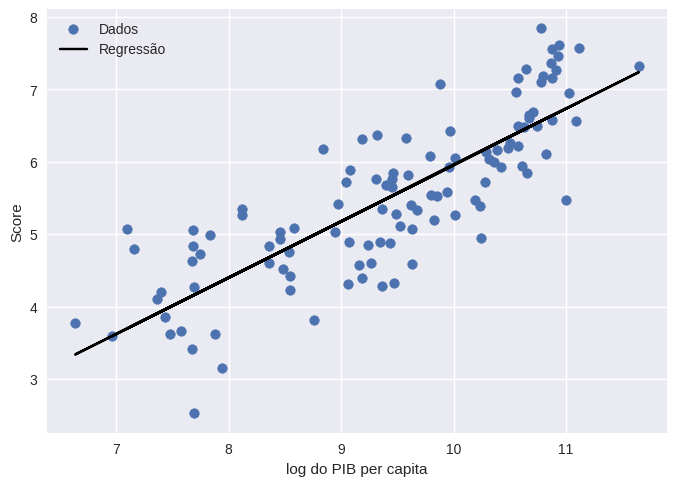

In [26]:
beta1 = fit.params['Logged GDP per capita']
beta0 = fit.params['const']

plt.style.use('seaborn-v0_8')
plt.scatter(x_treino,y_treino, label = 'Dados')
plt.plot(x_treino,beta1*x_treino+beta0, color = 'black', label='Regressão')
plt.legend()
plt.xlabel('log do PIB per capita')
plt.ylabel('Score')
plt.show()

Para o erro quadrático médio $\frac{1}{n}\sum_{i=1}^{n} e_i^2 = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$, temos:

In [ ]:
print(f'{fit.ssr} / {len(x_treino)}:\n')
print(fit.mse_resid)

44.54187725677381 / 111:

0.4086410757502184


Podemos ver que nosso erro quadrático médio está controlado, considerando que temos valores para o score em torno de $2.5$ até $7.8$.

Analisando os resíduos:

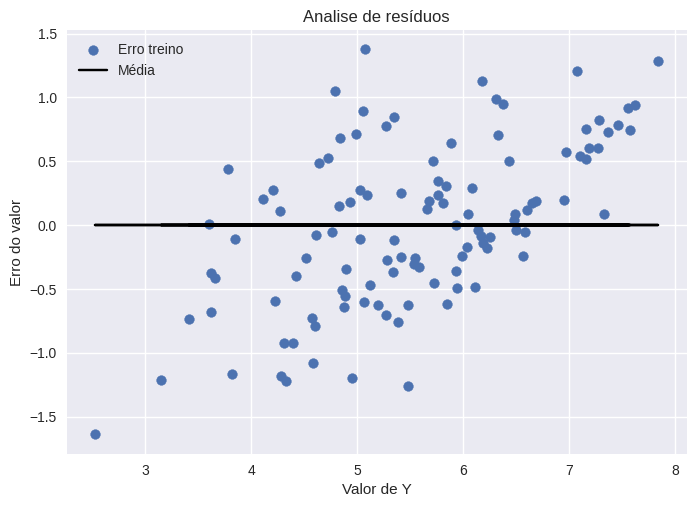

In [27]:
erros = fit.resid
plt.style.use('seaborn-v0_8')
plt.scatter(y_treino,erros, label = "Erro treino")
plt.plot(y_treino,[np.mean(erros)]*len(x_treino),color="black", label = "Média")
plt.legend()
plt.title('Analise de resíduos')
plt.xlabel('Valor de Y')
plt.ylabel('Erro do valor')
plt.show()

É possível perceber que, apesar do erro não parecer ter tanta relação com y, ele ainda possui certa tendência linear. Isso provavelmente se deve ao fato de parte do modelo real estar contido no erro do nosso modelo, visto que estamos realizando uma regressão simples e, consequentemente, a relação entre as outras variáveis e o Y está contida nos resíduos do nosso modelo.

## Realizando previsões 🔮 <a class='anchor' id='previsoes'></a> [↑](#top)

Prevendo a felicidade dos valores de teste e comparando os valores reais com os valores previstos:

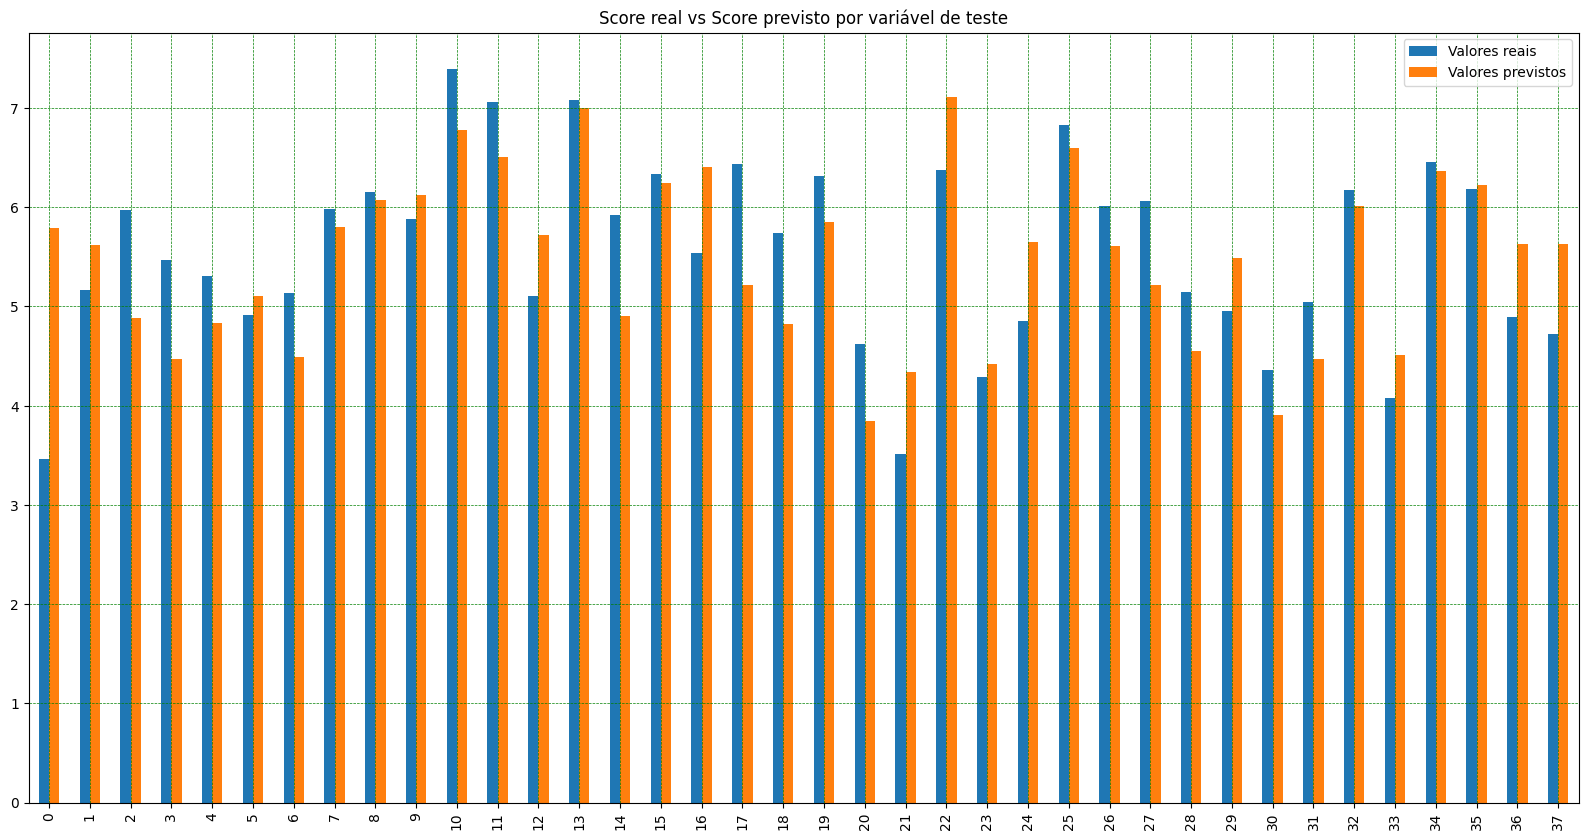

In [ ]:
plt.style.use('default')
previsoes = fit.predict(sm.add_constant(x_teste))
comparacoes = pd.DataFrame({'Valores reais': y_teste, 'Valores previstos': previsoes})
comparacoes.reset_index(inplace=True, drop=True)
comparacoes.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Score real vs Score previsto por variável de teste")
plt.show()

Calculando o erro quadrático médio $\frac{1}{n}\sum_{i=1}^{n} e_i^2 = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$:

In [ ]:
print('Erro quadrático médio:', metrics.mean_squared_error(y_teste, previsoes))

Erro quadrático médio: 0.5305148309968919


Como podemos ver, o erro quadrático médio nos valores de teste foi bem próximo dos valores de treino. Isso indica que nossa regressão possui um poder preditivo similar para valores fora da amostra de treino.

Fazendo o scatterplot dos valores de teste e seus Y verdadeiros, com o intervalo de confiança de 95% para a média das novas observações dado pela previsão.

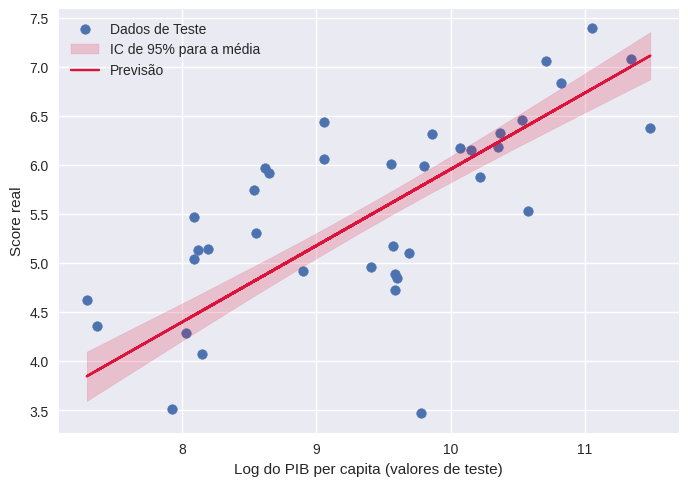

In [28]:
plt.style.use('seaborn-v0_8')
cis = fit.get_prediction(sm.add_constant(x_teste)).summary_frame(alpha=0.05)
plt.scatter(x_teste,y_teste,label='Dados de Teste')
plt.fill_between(np.sort(x_teste), y1=np.sort(cis['mean_ci_lower']), y2=np.sort(cis['mean_ci_upper']), alpha=0.2, label = 'IC de 95% para a média', color='crimson')
plt.plot(x_teste, beta1*x_teste+beta0, label='Previsão', color='crimson')
plt.ylabel('Score real')
plt.xlabel('Log do PIB per capita (valores de teste)')
plt.legend()
plt.show()


Analisando os resíduos:

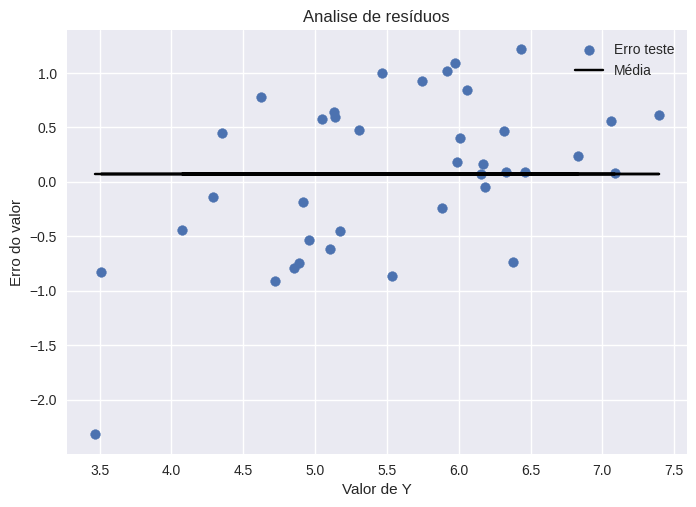

In [ ]:
erros = y_teste-(beta1*x_teste+beta0)
plt.style.use('seaborn-v0_8')
plt.scatter(y_teste,erros, label = "Erro teste")
plt.plot(y_teste,[np.mean(erros)]*len(x_teste),color="black", label = "Média")
plt.legend()
plt.title('Analise de resíduos')
plt.xlabel('Valor de Y')
plt.ylabel('Erro do valor')
plt.show()

A mesma discussão realizada anteriormente nos resíduos do treino também se aplica nos resíduos do teste.